## การพลอตข้อมูล วิเคราะห์สถิติเบื้องต้น EDA จากข้อมูลสกัดตามฝนสถานี 160 km
* ข้อมูลได้จากการสกัดสถานีฝนตามระยะทาง 160 km
* ต้องทดสอบความสัมพันธ์ระหว่างระยะทาง

In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## อ่านและกรองข้อมูล Read/Cleansing
* ตรงนี้สามารถกรอง ค่าสะท้อนอ่อน ๆ กับ ค่าการสะท้อนที่อาจจะเป็นลูกเห็บออกไปได้คือ <10 dBZ & >55 dBZ
* ในที่นี้ยึดทดสอบเอาฝนใกล้ภาคพื้นคือ cappi1km ที่เข้าเกณฑ์ฝนอ่อน กับ cappi 4km ที่เข้าเกณฑ์ลูกเห็บ ให้ remove ทิ้ง
* จุดนี้หากมีข้อมูลที่มาก สามารถทดสอบการตัดข้อมูลได้ ร่วมกันกับ rain_x ที่เป็นฝนสสน.

In [3]:
df = pd.read_csv('../2results/df_org_dbz_rain_test160km.csv')
df.head()

,Unnamed: 0,cappi1km,cappi2km,cappi3km,cappi4km,ppi1,ppi2,ppi3,ppi4,full_date,code,rain_x
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-21-00:00,BDLH,0.0
1,1,26.512453,26.826717,27.085846,26.818087,26.534142,27.517904,NaN,NaN,2018-07-21-00:00,BHMN,0.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-21-00:00,BKDN,0.0
3,3,33.216125,33.015232,32.560196,32.044888,33.175865,31.445189,NaN,NaN,2018-07-21-00:00,BNTK,0.0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-21-00:00,BPPS,0.0


In [4]:
df.drop(df[df['rain_x'] <= 0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
#df.drop(df[df['rain_x'] < 1.0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
#df.drop(df[df['cappi1km'] < 10].index, inplace = True) #ฝนอ่่อนมากๆ < 10 dBZ
#df.drop(df[df['cappi4km'] > 55].index, inplace = True) #ค่าการสะท้อนที่อาจเป็นลูกเห็บ 55 dBZ มุมยกด้านบนสุด
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True)

,cappi1km,cappi2km,cappi3km,cappi4km,ppi1,ppi2,ppi3,ppi4,full_date,code,rain_x
0,21.600323,21.651548,21.254112,20.689474,22.848606,21.651548,17.299454,16.509392,2018-07-21-02:00,YOM006,0.4
1,20.832413,19.653109,19.943129,20.224384,20.718672,21.813087,19.654741,20.150036,2018-07-21-03:00,BDLH,5.8
2,30.103109,30.241182,29.542423,27.825153,28.139114,32.976849,29.036983,19.397022,2018-07-21-03:00,NKTI,0.4
3,16.882086,18.167044,19.741882,19.767611,16.245510,13.865370,14.419718,18.167044,2018-07-21-03:00,PICI,0.4
4,26.769304,26.772455,26.795412,26.697132,22.814074,28.619864,26.118504,26.813993,2018-07-21-03:00,PPRM,0.6
...,...,...,...,...,...,...,...,...,...,...,...
110,12.722622,12.673051,12.329172,9.504724,18.879297,14.405016,5.796728,1.051790,2018-07-23-14:00,DIV004,0.2
111,29.812841,29.625065,29.498009,29.461802,30.760672,29.536051,29.301682,29.194805,2018-07-23-14:00,NMPR,0.6
112,16.299009,16.412868,16.471737,16.398716,18.608812,16.959469,15.822438,17.097704,2018-07-23-14:00,NSNO,0.2
113,29.879730,29.846922,29.810345,29.795416,30.060654,29.911350,29.760616,29.700960,2018-07-23-14:00,PPTC,0.2


## จำแนกฝนตาม WMO 2018
* rainfall intensity จาก wmo https://www.researchgate.net/publication/353769617_Erosion_Rate_of_the_Aliano_Biancana_Badlands_Based_on_a_3D_Multi-Temporal_High-Resolution_Survey_and_Implications_for_Wind-Driven_Rain

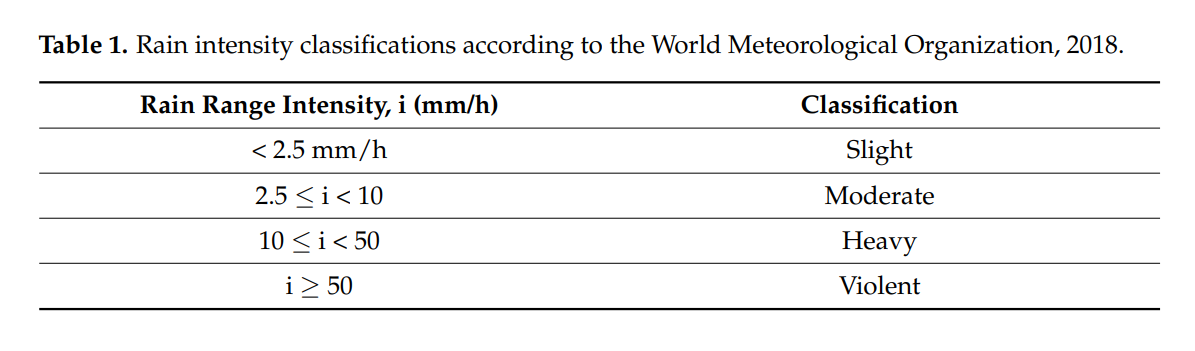

In [5]:
# จำแนกฝนตาม WMO 2018 https://www.researchgate.net/publication/353769617_Erosion_Rate_of_the_Aliano_Biancana_Badlands_Based_on_a_3D_Multi-Temporal_High-Resolution_Survey_and_Implications_for_Wind-Driven_Rain
df['rain_intensity'] = 'Slight'
df['rain_intensity'][df['rain_x'] <= 2.5] = 'Slight'
df['rain_intensity'][(df['rain_x'] > 2.5) & (df['rain_x'] <= 10.0)] = 'Moderate'
df['rain_intensity'][(df['rain_x'] > 10.0) & (df['rain_x'] <= 50.0)] = 'Heavy'
df['rain_intensity'][df['rain_x'] > 50.0] = 'Violent'
df

,cappi1km,cappi2km,cappi3km,cappi4km,ppi1,ppi2,ppi3,ppi4,full_date,code,rain_x,rain_intensity
319,21.600323,21.651548,21.254112,20.689474,22.848606,21.651548,17.299454,16.509392,2018-07-21-02:00,YOM006,0.4,Slight
323,20.832413,19.653109,19.943129,20.224384,20.718672,21.813087,19.654741,20.150036,2018-07-21-03:00,BDLH,5.8,Moderate
367,30.103109,30.241182,29.542423,27.825153,28.139114,32.976849,29.036983,19.397022,2018-07-21-03:00,NKTI,0.4,Slight
377,16.882086,18.167044,19.741882,19.767611,16.245510,13.865370,14.419718,18.167044,2018-07-21-03:00,PICI,0.4,Slight
385,26.769304,26.772455,26.795412,26.697132,22.814074,28.619864,26.118504,26.813993,2018-07-21-03:00,PPRM,0.6,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...
4219,12.722622,12.673051,12.329172,9.504724,18.879297,14.405016,5.796728,1.051790,2018-07-23-14:00,DIV004,0.2,Slight
4251,29.812841,29.625065,29.498009,29.461802,30.760672,29.536051,29.301682,29.194805,2018-07-23-14:00,NMPR,0.6,Slight
4253,16.299009,16.412868,16.471737,16.398716,18.608812,16.959469,15.822438,17.097704,2018-07-23-14:00,NSNO,0.2,Slight
4267,29.879730,29.846922,29.810345,29.795416,30.060654,29.911350,29.760616,29.700960,2018-07-23-14:00,PPTC,0.2,Slight


In [6]:
#df.dropna(inplace=True)

https://wx.erau.edu/faculty/mullerb/Wx365/Radar_equation/radar_equation.pdf

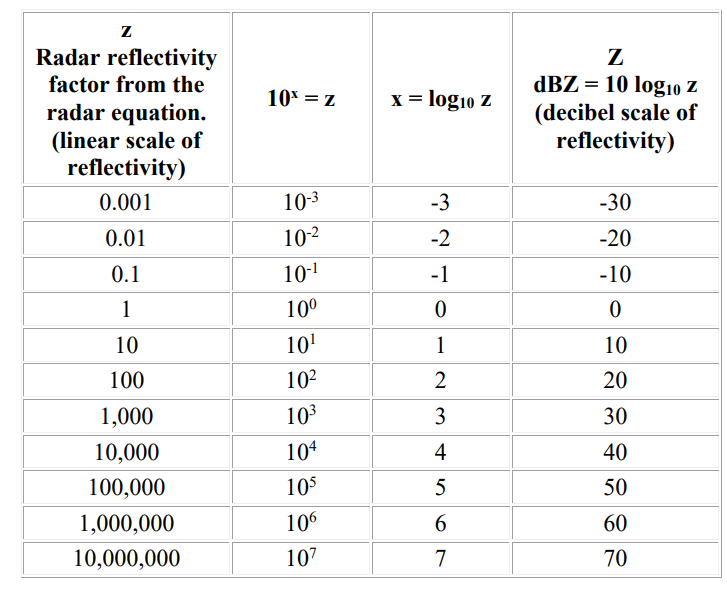

## ทดสอบ ZRs เพื่อหาค่า corr กับ ฝนสสน.

https://severeweather.wmo.int/TCFW/RAIV_Workshop2017/11_Radar_StaceySteward.pdf
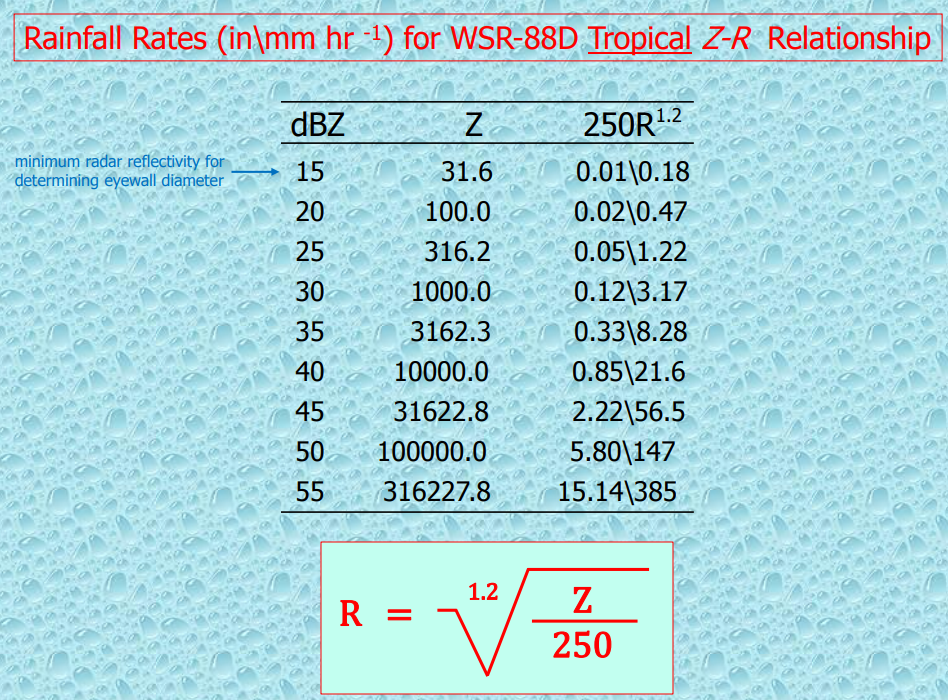

## ทดสอบการคำนวณ ZR

In [7]:
#แปลง dBZ > Z  # Z=a*R^b
import math
a=250
b=1.2
dBZ = 30
Z = 10**(dBZ/10.)
R = (Z/a)**b # Z=250*R^1.2
print('Z: ', Z)
print('R: ', R, 'mm/hr')

Z:  1000.0
R:  5.278031643091577 mm/hr


## คำนวณ ZRs สามแบบกับ cappis/ppis
เป็นการเพิ่ม features ก่อนนำไปสร้าง model ML

### ZR marshall/palmer

In [8]:
### ZR marshall/palmer
a=200. 
b=1.6
df['rr_MP_c1']=((10**(df['cappi1km']/10.))/a)**b
df['rr_MP_c2']=((10**(df['cappi2km']/10.))/a)**b
df['rr_MP_c3']=((10**(df['cappi3km']/10.))/a)**b
df['rr_MP_c4']=((10**(df['cappi4km']/10.))/a)**b
df['rr_MP_p1']=((10**(df['ppi1']/10.))/a)**b
df['rr_MP_p2']=((10**(df['ppi2']/10.))/a)**b
df['rr_MP_p3']=((10**(df['ppi3']/10.))/a)**b
df['rr_MP_p4']=((10**(df['ppi4']/10.))/a)**b
#df

### ZR Rosenfeld

In [9]:
### ZR Rosenfeld
a=250. 
b=1.2
df['rr_RF_c1']=((10**(df['cappi1km']/10.))/a)**b
df['rr_RF_c2']=((10**(df['cappi2km']/10.))/a)**b
df['rr_RF_c3']=((10**(df['cappi3km']/10.))/a)**b
df['rr_RF_c4']=((10**(df['cappi4km']/10.))/a)**b
df['rr_RF_p1']=((10**(df['ppi1']/10.))/a)**b
df['rr_RF_p2']=((10**(df['ppi2']/10.))/a)**b
df['rr_RF_p3']=((10**(df['ppi3']/10.))/a)**b
df['rr_RF_p4']=((10**(df['ppi4']/10.))/a)**b
#df

### ZR Summer Deep Convection

In [10]:
### ZR Summer Deep Convection
a=300. 
b=1.4
df['rr_SC_c1']=((10**(df['cappi1km']/10.))/a)**b
df['rr_SC_c2']=((10**(df['cappi2km']/10.))/a)**b
df['rr_SC_c3']=((10**(df['cappi3km']/10.))/a)**b
df['rr_SC_c4']=((10**(df['cappi4km']/10.))/a)**b
df['rr_SC_p1']=((10**(df['ppi1']/10.))/a)**b
df['rr_SC_p2']=((10**(df['ppi2']/10.))/a)**b
df['rr_SC_p3']=((10**(df['ppi3']/10.))/a)**b
df['rr_SC_p4']=((10**(df['ppi4']/10.))/a)**b
#df

# จัดตารางใหม่ ตั้งชื่อให้สอดคล้อง ก่อนนำไปวิเคราะห์

In [11]:
df['rain_truth']=df['rain_x'] #เพิ่มคอลัมน์ target ด้านหลังสุด
df.drop(columns=['rain_x','full_date','code'], inplace=True) #ลบคอลัน์
df.rename(columns={"cappi1km": "dBZ_c1", "cappi2km": "dBZ_c2","cappi3km": "dBZ_c3","cappi4km": "dBZ_c4",
                  "ppi1": "dBZ_p1", "ppi2": "dBZ_p2", "ppi3": "dBZ_p3", "ppi4": "dBZ_p4"}, inplace=True)
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,dBZ_p1,dBZ_p2,dBZ_p3,dBZ_p4,rain_intensity,rr_MP_c1,...,rr_RF_p4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4,rr_SC_p1,rr_SC_p2,rr_SC_p3,rr_SC_p4,rain_truth
319,21.600323,21.651548,21.254112,20.689474,22.848606,21.651548,17.299454,16.509392,Slight,0.594845,...,0.126940,0.359812,0.365803,0.321815,0.268260,0.538065,0.365803,0.089940,0.069718,0.4
323,20.832413,19.653109,19.943129,20.224384,20.718672,21.813087,19.654741,20.150036,Moderate,0.448268,...,0.347117,0.280911,0.192073,0.210896,0.230911,0.270797,0.385356,0.192174,0.225442,5.8
367,30.103109,30.241182,29.542423,27.825153,28.139114,32.976849,29.036983,19.397022,Slight,13.641104,...,0.281913,5.577834,5.831708,4.655534,2.676404,2.961463,14.086044,3.955560,0.176853,0.4
377,16.882086,18.167044,19.741882,19.767611,16.245510,13.865370,14.419718,18.167044,Slight,0.104589,...,0.200686,0.078618,0.118964,0.197649,0.199295,0.064033,0.029729,0.035546,0.118964,0.4
385,26.769304,26.772455,26.795412,26.697132,22.814074,28.619864,26.118504,26.813993,Slight,3.994300,...,2.188523,1.904289,1.906224,1.920383,1.860496,0.532109,3.457890,1.543906,1.931921,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,12.722622,12.673051,12.329172,9.504724,18.879297,14.405016,5.796728,1.051790,Slight,0.022593,...,0.001773,0.020568,0.020242,0.018118,0.007289,0.149669,0.035378,0.002206,0.000478,0.2
4251,29.812841,29.625065,29.498009,29.461802,30.760672,29.536051,29.301682,29.194805,Slight,12.257634,...,4.225213,5.079583,4.781227,4.589353,4.536098,6.894841,4.645980,4.307900,4.162009,0.6
4253,16.299009,16.412868,16.471737,16.398716,18.608812,16.959469,15.822438,17.097704,Slight,0.084371,...,0.149347,0.065147,0.067582,0.068877,0.067275,0.137172,0.080604,0.055869,0.084277,0.2
4267,29.879730,29.846922,29.810345,29.795416,30.060654,29.911350,29.760616,29.700960,Slight,12.563448,...,4.859451,5.190300,5.135696,5.075496,5.051129,5.502015,5.243476,4.994782,4.899646,0.2


## save dataframe ออกไปเป็น csv

In [12]:
## save dataframe ออกไปเป็น csv เพื่อนำไปสร้าง Model ML ANN
df.to_csv('../2results/df_org_dbz_rain_test160km_full_features.csv')

## พลอต scatter diagrams ก่อน remove nan

In [13]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="rain_intensity")

## พลอต correlation matrix แบบ conditional rain ก่อน remove nan

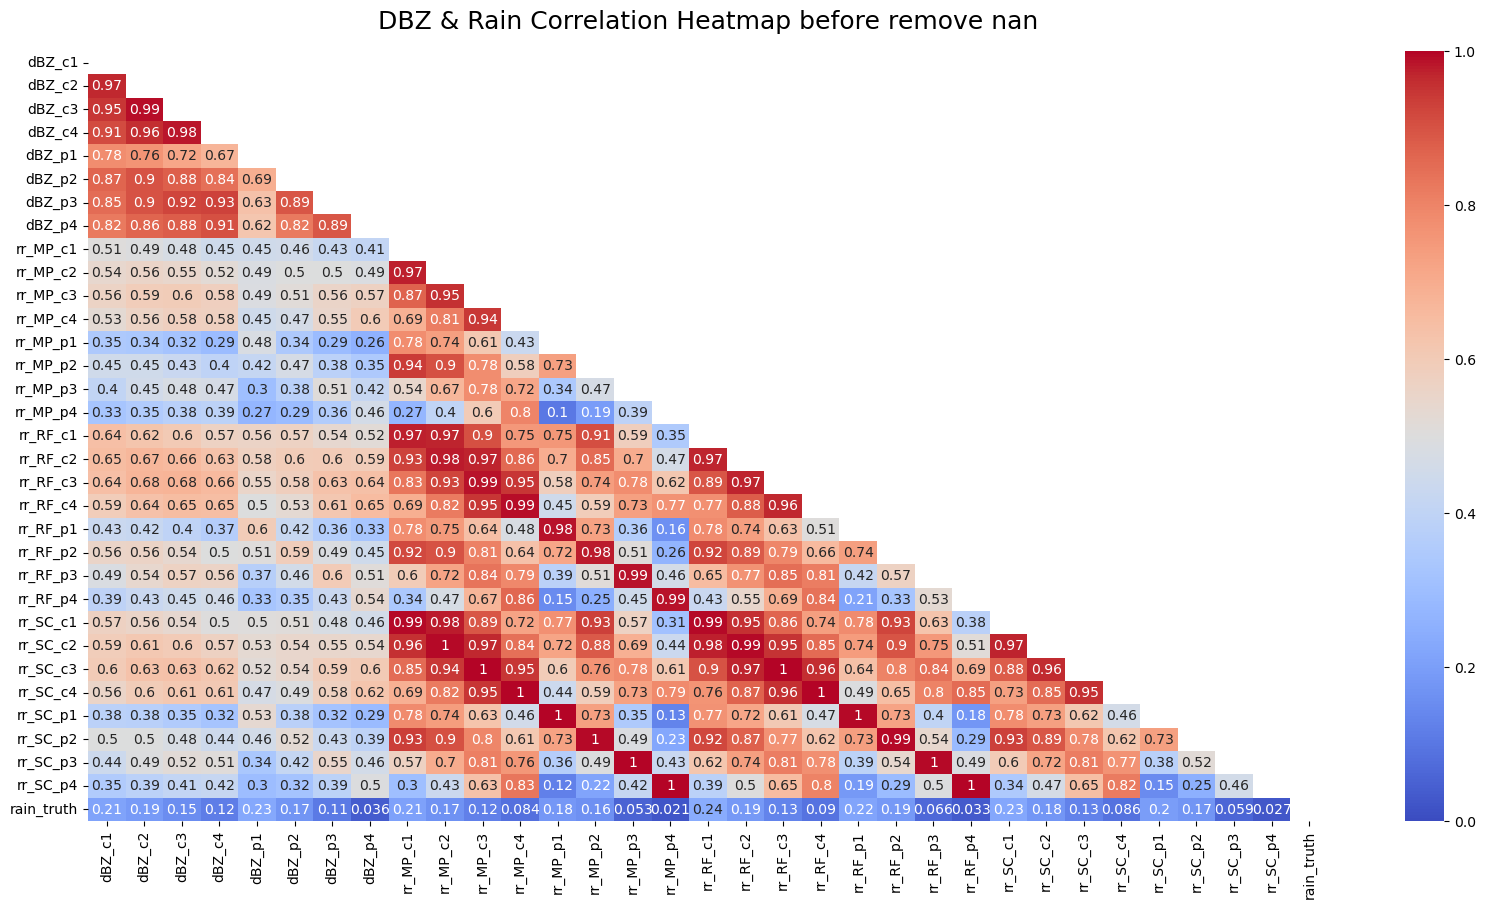

In [14]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('DBZ & Rain Correlation Heatmap before remove nan', fontdict={'fontsize':18}, pad=16);

### หลัง remove nan

In [15]:
#หลัง remove nan
df=df.dropna()
#df

In [16]:
#df.corr()

## พลอต scatter diagrams หลัง remove nan

In [17]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="rain_intensity")

## พลอต correlation matrix แบบ conditional rain หลัง remove nan

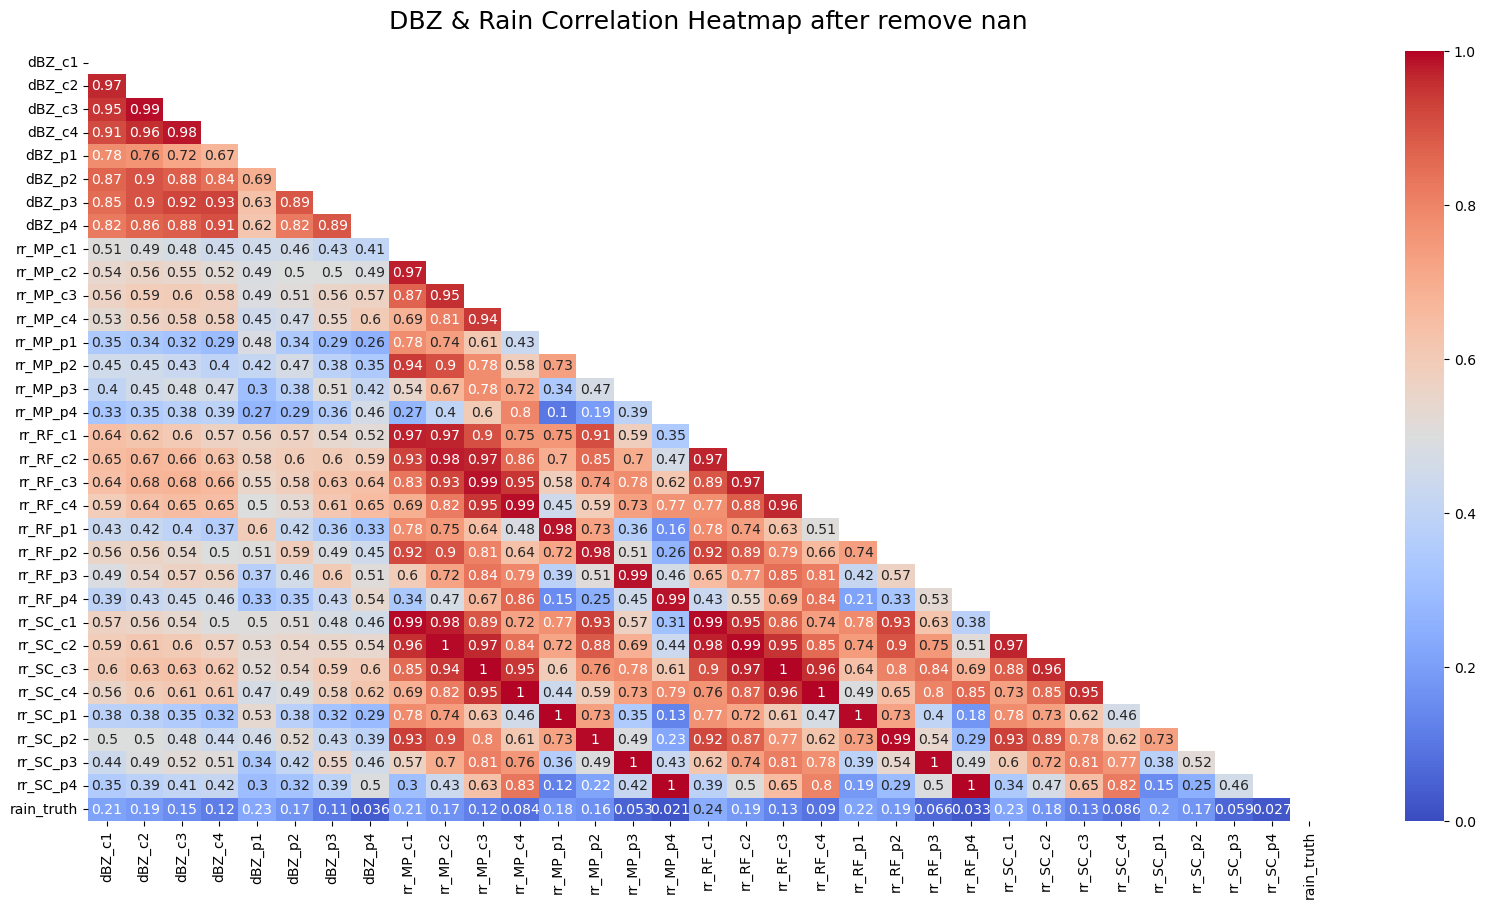

In [18]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('DBZ & Rain Correlation Heatmap after remove nan', fontdict={'fontsize':18}, pad=16);

## อธิบายผล correlation matrix
* ค่าสหสัมพันธ์ระหว่างฝนภาคพื้นดินกับตัวแปรเรดาร์ตรวจอากาศมีค่าในภาพรวมค่อนข้างต่ำ เนื่องจากเป็นข้อมูลฝนรายชั่วโมง มีการกวาดจำนวนสี่ครั้งต่อชั่วโมง 
* ค่าสหสัมพันธ์ระหว่างค่า dBZ กับฝนภาคพื้นดิน ไม่มีความแตกต่างมากนักกับค่าฝนประมาณค่าจากเรดาร์ที่ใช้ค่า reflectivity factor (Z) 
* ค่าสหสัมพันธ์ที่ดีจะอยู่ในมุมยกที่ 1 และ 2 ของทั้ง cappi และ ppi
* ค่าสหสัมพันธ์ของ ZR ที่ดีที่สุดคือ Rosenfeld ของข้อมูล cappi ในมุมยกที่หนึ่ง เนื่องจากช่วงเวลาที่นำมาวิเคราะห์อยู่ในช่วงที่ได้รับอิทธิพลของเมฆฝนฟ้าคะนองจากการสลายตัวของพายุโซนร้อน
* ค่าสหสัมพันธ์ระหว่าง dBZ ที่ได้จาก cappi ในแต่ละความสูงและจาก PPI ในแต่ละมุมยก มีความสัมพันธ์ที่สูงกับค่าฝนประมาณค่าจากเรดาร์ด้วย ZR แบบ Rosenfeld กับ Summer Convective ในขณะที่ค่าสหสัมพันธ์มีค่าต่ำเมื่อพิจารณาค่า ZR แบบ Marshall Palmer แสดงให้เห็นว่าในช่วงที่มีเมฆฝนฟ้าคะนองควรนำ ZR แบบ RF กับ SC มาใช้ในการประมาณค่าฝน



## พลอต boxplot

### boxplot cappi 1km

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 1km (dBZ)')]

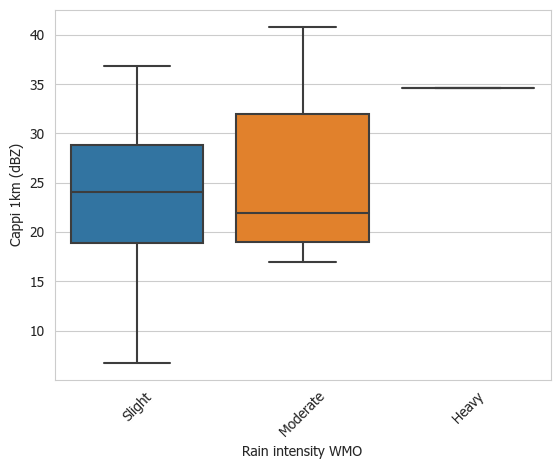

In [19]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c1', data = df) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 1km (dBZ)')

### boxplot cappi 2km

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 2km (dBZ)')]

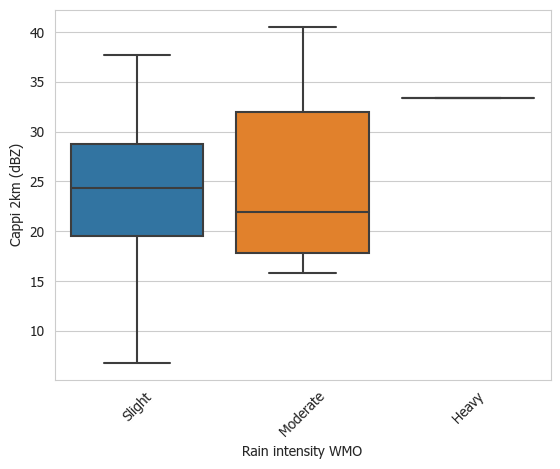

In [20]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c2', data = df) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 2km (dBZ)')

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 3km (dBZ)')]

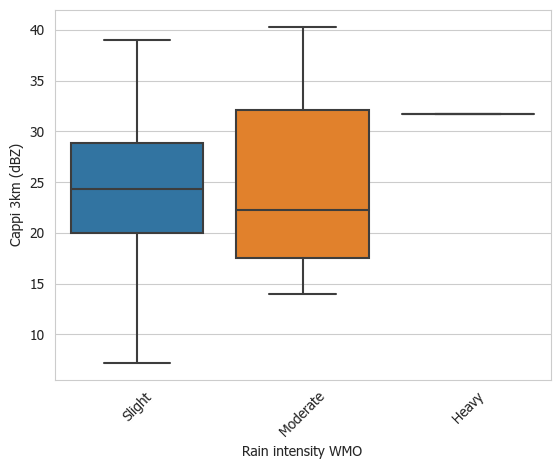

In [21]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c3', data = df) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 3km (dBZ)')

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 4km (dBZ)')]

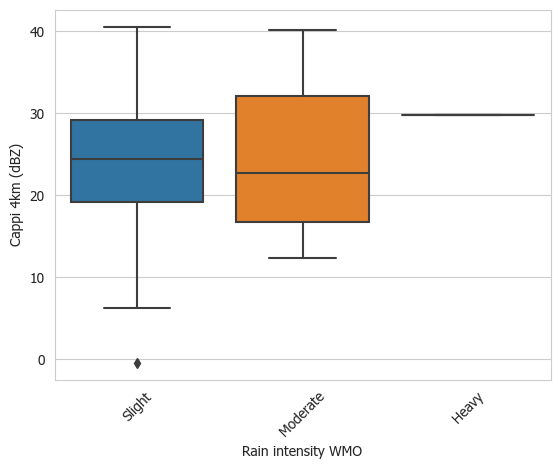

In [22]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c4', data = df) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 4km (dBZ)')

In [23]:
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,dBZ_p1,dBZ_p2,dBZ_p3,dBZ_p4,rain_intensity,rr_MP_c1,...,rr_RF_p4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4,rr_SC_p1,rr_SC_p2,rr_SC_p3,rr_SC_p4,rain_truth
319,21.600323,21.651548,21.254112,20.689474,22.848606,21.651548,17.299454,16.509392,Slight,0.594845,...,0.126940,0.359812,0.365803,0.321815,0.268260,0.538065,0.365803,0.089940,0.069718,0.4
323,20.832413,19.653109,19.943129,20.224384,20.718672,21.813087,19.654741,20.150036,Moderate,0.448268,...,0.347117,0.280911,0.192073,0.210896,0.230911,0.270797,0.385356,0.192174,0.225442,5.8
367,30.103109,30.241182,29.542423,27.825153,28.139114,32.976849,29.036983,19.397022,Slight,13.641104,...,0.281913,5.577834,5.831708,4.655534,2.676404,2.961463,14.086044,3.955560,0.176853,0.4
377,16.882086,18.167044,19.741882,19.767611,16.245510,13.865370,14.419718,18.167044,Slight,0.104589,...,0.200686,0.078618,0.118964,0.197649,0.199295,0.064033,0.029729,0.035546,0.118964,0.4
385,26.769304,26.772455,26.795412,26.697132,22.814074,28.619864,26.118504,26.813993,Slight,3.994300,...,2.188523,1.904289,1.906224,1.920383,1.860496,0.532109,3.457890,1.543906,1.931921,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,12.722622,12.673051,12.329172,9.504724,18.879297,14.405016,5.796728,1.051790,Slight,0.022593,...,0.001773,0.020568,0.020242,0.018118,0.007289,0.149669,0.035378,0.002206,0.000478,0.2
4251,29.812841,29.625065,29.498009,29.461802,30.760672,29.536051,29.301682,29.194805,Slight,12.257634,...,4.225213,5.079583,4.781227,4.589353,4.536098,6.894841,4.645980,4.307900,4.162009,0.6
4253,16.299009,16.412868,16.471737,16.398716,18.608812,16.959469,15.822438,17.097704,Slight,0.084371,...,0.149347,0.065147,0.067582,0.068877,0.067275,0.137172,0.080604,0.055869,0.084277,0.2
4267,29.879730,29.846922,29.810345,29.795416,30.060654,29.911350,29.760616,29.700960,Slight,12.563448,...,4.859451,5.190300,5.135696,5.075496,5.051129,5.502015,5.243476,4.994782,4.899646,0.2


In [24]:
df['rain_intensity']

319       Slight
323     Moderate
367       Slight
377       Slight
385       Slight
          ...   
4219      Slight
4251      Slight
4253      Slight
4267      Slight
4407       Heavy
Name: rain_intensity, Length: 115, dtype: object

## งานต่อไป
* อ่าน CSV ที่เตรียม features ZRs เข้ามา
* cleansing data (remove nan)
* data visulizaiton (scatter pariplot, correlation matrix, boxplot)
* implement model ANN
* K-fold
* Feature important
* Parameter tuning
* Analyzing resutls of model with different features